# EDA - Project "King County House Sales"
Author: Marvin Lorenzen, lorenzen-marvin1995@gmail.com

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **yr_sale** - Year the house was sold
* **mth_sale** - Month the house was sold
* **price** -  Price of the house
* **bedrooms** - Numbers of Bedrooms/House
* **bathrooms** - Numbers of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## import libraries and data

In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np

%matplotlib inline

In [539]:
df = pd.read_csv("King_County_House_prices_dataset.csv") # import the data 

# first overview of the data 

In [540]:
df.shape #there are 21597 rows and 21 columns

(21597, 21)

In [541]:
df.describe() # first overview of the columns and the distribution

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


- the dataset has 21 columns and 21597 rows 
- only the columns "sqft_basement" and "date" are object datatypes
- the columns "waterfront", "view" and "yr_renovated" have missing data

# data cleaning

## incomplete data

In [543]:
#sum all entries with "NaN" and creat a new column to count these entries 
incomplete = pd.DataFrame(df.isnull().sum(), columns=["count"]) 
# create a new column which divides the counted entries to get a content
incomplete["relationship"] = incomplete["count"]/21597*100
incomplete[incomplete["count"]!=0]

,count,relationship
waterfront,2376,11.001528
view,63,0.291707
yr_renovated,3842,17.789508


In [544]:
df.shape 

(21597, 21)

In [545]:
df.dropna().shape # shows how many rows are lost if we delete all rows which an entry is missing

(15762, 21)

- waterfront, view, yr_renovated have incomplete data
- with 18% the column yr_renoveted has the most missing entries
- if i drop all rows with missing data, i lose 1/4 of my data 
- to continue working with all the data, I replace the NaN data against the median
- there is a systematic for the missing data?

In [546]:
df[["waterfront", "view", "yr_renovated"]].describe() # take a look at the median

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [547]:
df["waterfront"] = df["waterfront"].fillna(value=0) # fill the missing entries with the median
df["view"] = df["view"].fillna(value=0)
df["yr_renovated"] = df["yr_renovated"].fillna(value=0)
df.dropna().shape

(21597, 21)

## edit "sqft basement"

In [548]:
# check that is always true that "sqft_basement" = "sqft_living" - sqft_above"
test_df = df[["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "floors"]][df["sqft_basement"]!= "?"]
#print(pd.to_numeric(test_df["sqft_living"] - test_df["sqft_above"], downcast="float"),test_df["sqft_basement"])
k2 = pd.to_numeric(test_df["sqft_basement"], downcast="float") == pd.to_numeric(test_df["sqft_living"] - test_df["sqft_above"], downcast= "float")
k2.value_counts()

True    21143
dtype: int64

In [549]:
df["sqft_basement2"]= df["sqft_living"] - df["sqft_above"] # create a new column "sqft_basement2" which results from "sqft_living" and "sqft_above"
df.info()
df.drop("sqft_basement", axis=1, inplace=True) # delete the column "sqft_basement"
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21597 non-null int64
dtypes: float64

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


## split "date" in month and year

In [550]:
newdate = df["date"].str.split("/", expand=True) # split the date in three strings
# create a new column in the dataframe with the year and a other with the month the house was sold  
df["yr_sale"] = pd.to_numeric(newdate[2]) 
df["mth_sale"] = pd.to_numeric(newdate[0])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21597 non-null int64
yr_sale           21597 non-null int64
mth_sale        

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,2014,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2015,2


In [551]:
df.drop("date", axis =1, inplace=True) # delete the column "date"
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2015,2


## delete outlier

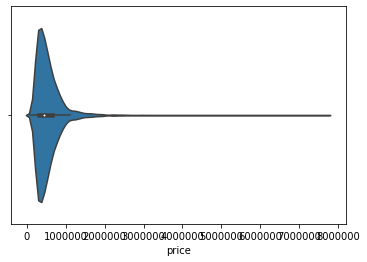

In [552]:
sns.violinplot(df["price"]) # check outlier in the column "price"

In [553]:
df["price"].describe() # take a look at the gap between the 0.75 quantil and the maximum

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [554]:
df["price"].quantile(0.99) #shows the highest one percent from the column "price"

1970000.0

In [555]:
df = df[df["price"] <= df["price"].quantile(0.99)] # deletes the highest one percent 

In [556]:
df.shape

(21383, 22)

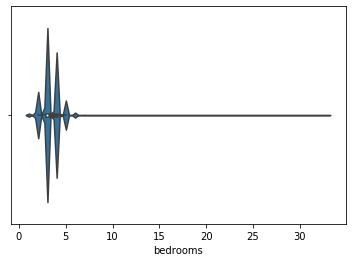

In [557]:
sns.violinplot(df["bedrooms"]) # check outlier in the column "bedrooms"

In [558]:
df["bedrooms"].describe() # take a look at the gap between the 0.75 quantil and the maximum

count    21383.000000
mean         3.363607
std          0.920616
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [559]:
df = df[df["bedrooms"] < 10] # more than 10 beds cannot be explained in the "real world"

In [560]:
df.shape

(21378, 22)

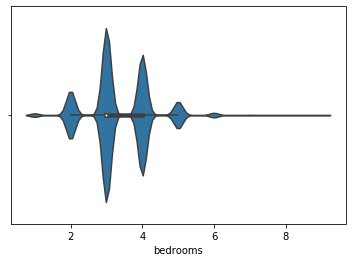

In [561]:
sns.violinplot(df["bedrooms"])

# data exploration 

## "waterfront"

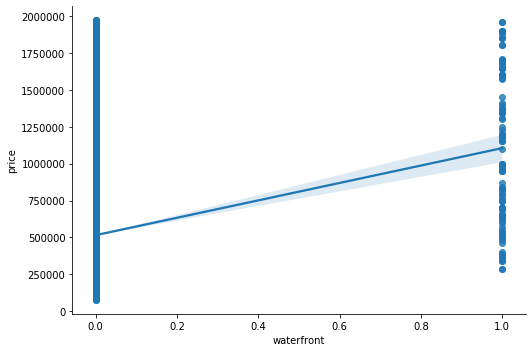

In [562]:
sns.lmplot("waterfront", "price", data=df, aspect=1.5);

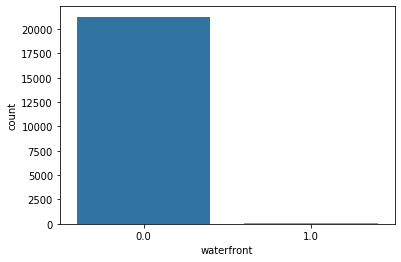

In [563]:
sns.countplot(df["waterfront"])

<Figure size 1440x360 with 0 Axes>

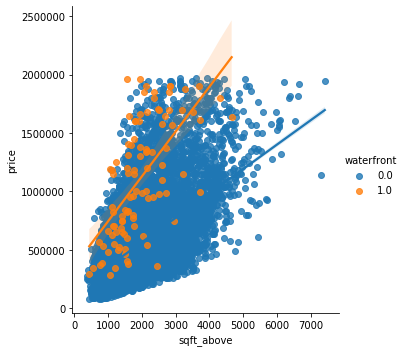

In [564]:
plt.figure(figsize=(20,5))
sns.lmplot(x="sqft_above",y="price",data=df ,hue="waterfront")

## "view"

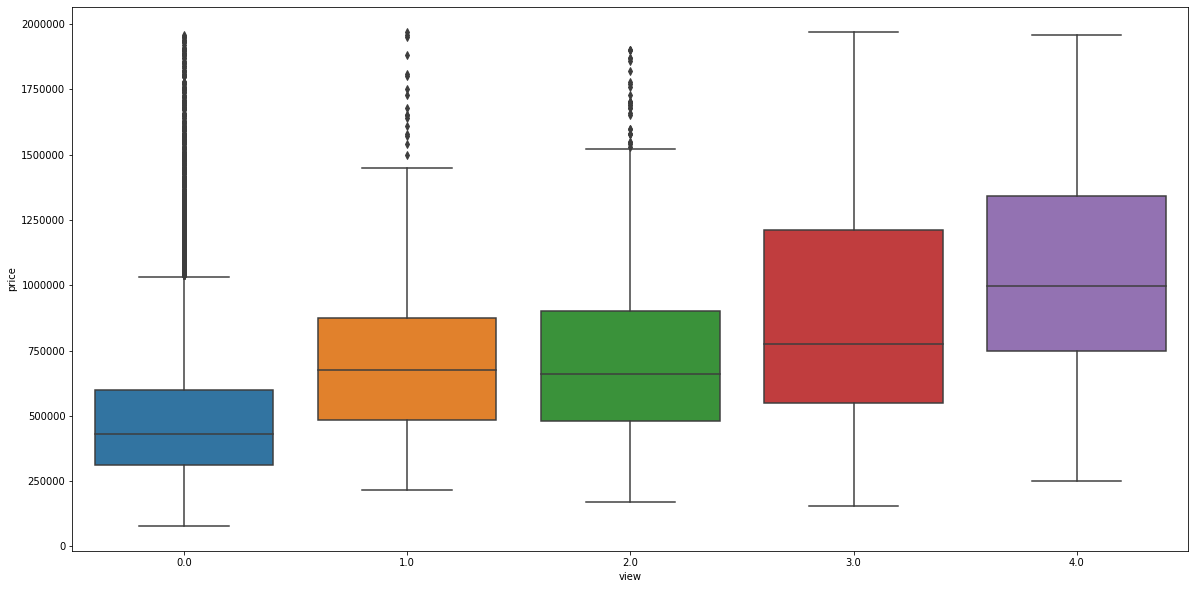

In [565]:
df_view = pd.concat([df["price"], df["view"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="view", y="price", data=df_view)

## "bedrooms"

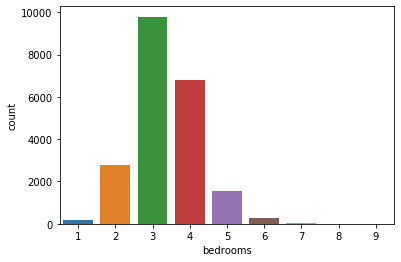

In [566]:
sns.countplot(df["bedrooms"])

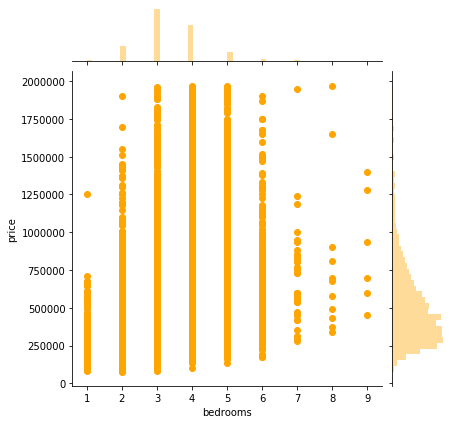

In [567]:
sns.jointplot(x="bedrooms",y="price",data=df,color="orange")

## "sqft_living"

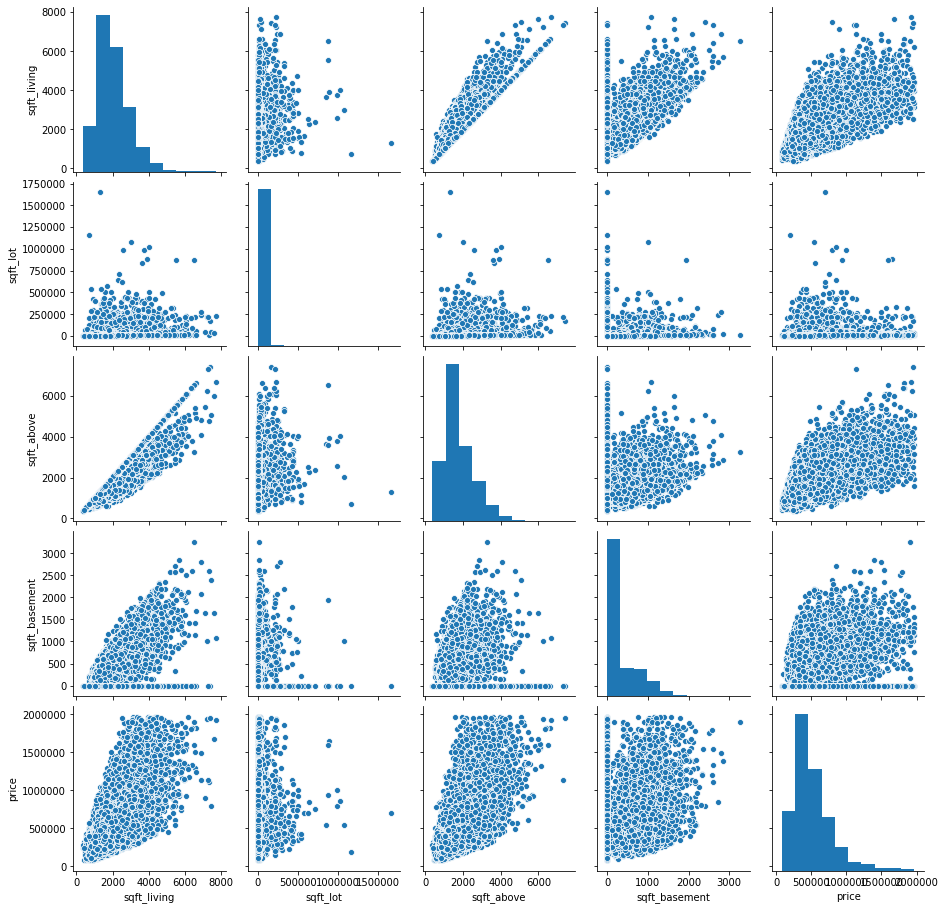

In [568]:
property_df =pd.DataFrame(df["sqft_living"])
property_df["sqft_lot"] = df["sqft_lot"]
property_df["sqft_above"] = df["sqft_above"] 
property_df["sqft_basement"] = df["sqft_basement2"]
property_df["price"] = df["price"]
sns.pairplot(property_df)

## "condition" 

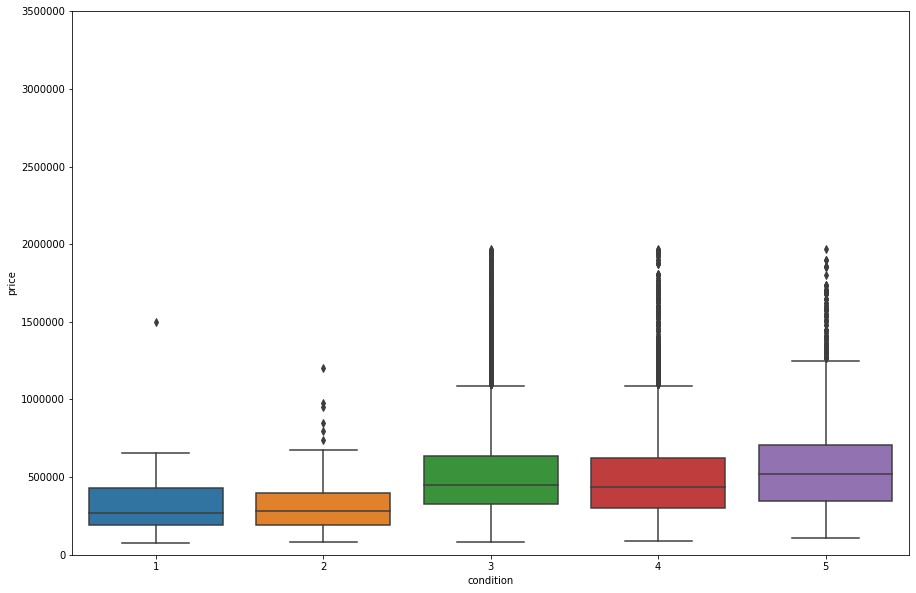

In [569]:
data_condition = pd.concat([df["price"], df["condition"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="condition", y="price", data=data_condition)
fig.axis(ymin=0, ymax=3500000);

<Figure size 1440x360 with 0 Axes>

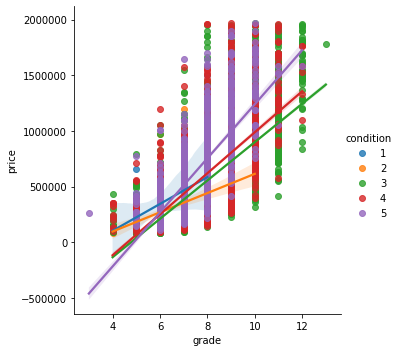

In [570]:
plt.figure(figsize=(20,5))
sns.lmplot(x="grade",y="price",data=df ,hue="condition")

## "grade"

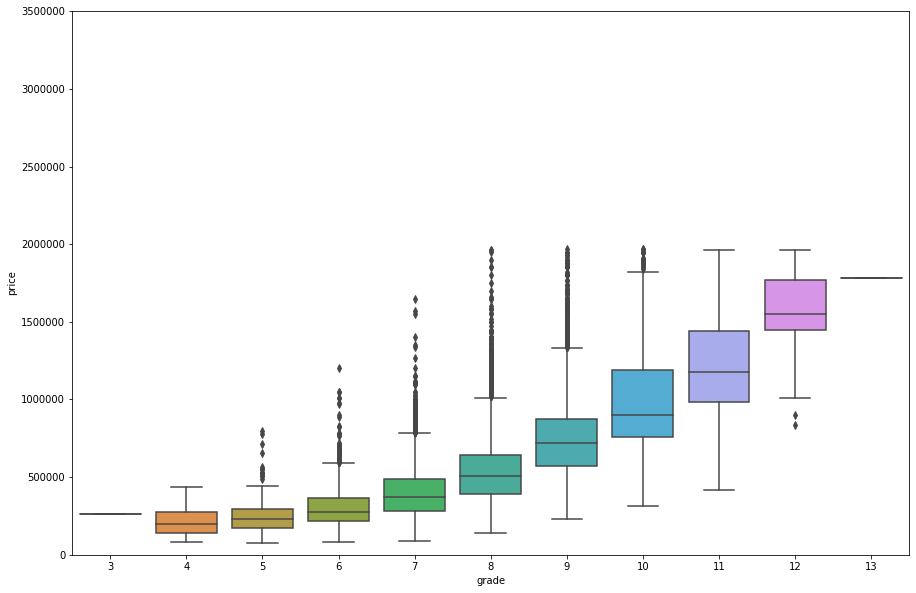

In [571]:
data_grade = pd.concat([df["price"], df["grade"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="grade", y="price", data=data_grade)
fig.axis(ymin=0, ymax=3500000);

<Figure size 1440x360 with 0 Axes>

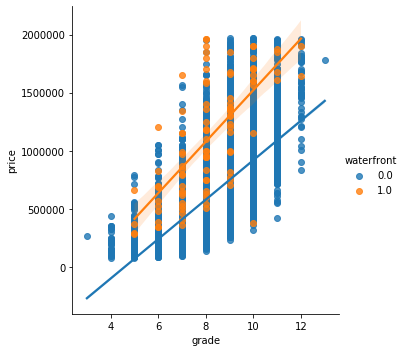

In [572]:
plt.figure(figsize=(20,5))
sns.lmplot(x="grade",y="price",data=df ,hue="waterfront")

## "sqft_living15"

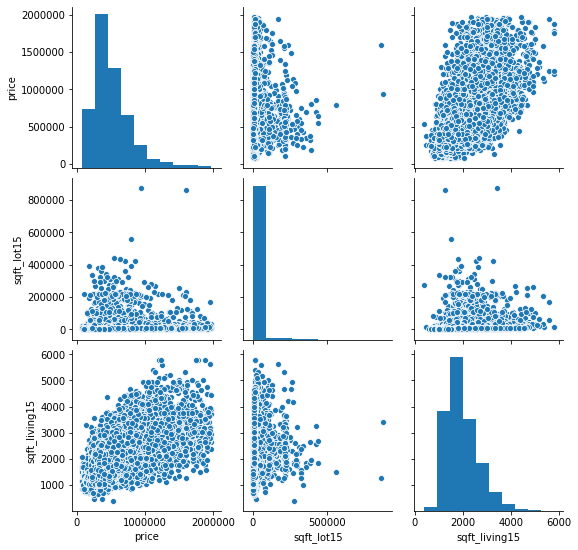

In [573]:
sns.pairplot(df[["price", "sqft_lot15", "sqft_living15"]])

## "floors"

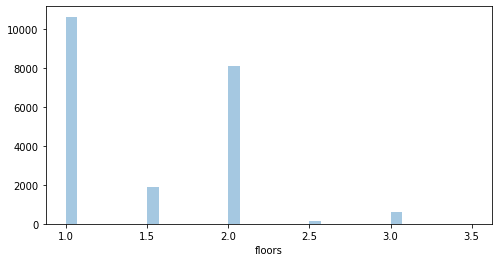

In [574]:
plt.figure(figsize=(8,4))
sns.distplot(df["floors"], kde=False);

# feature engineering

## log "price"

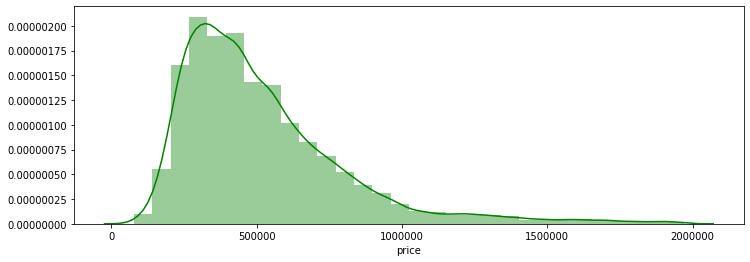

In [575]:
plt.figure(figsize=(12,4))
sns.distplot(df["price"],bins=30,color="green") # the distribution of the price is skew

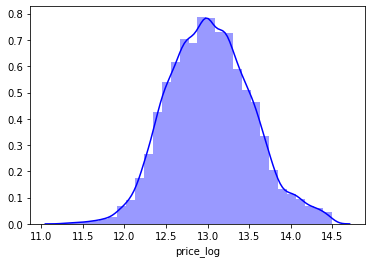

In [576]:
df["price_log"] = np.log(df["price"]) #use the logarithm to distribute the price normally
sns.distplot(df["price_log"],bins=30,color="blue")

## "view" yes or no

In [577]:
dummy_view = pd.get_dummies(df["view"], prefix = "view") #create dummy-variables
dummy_view_test= pd.concat([dummy_view], axis = 1) # save the dummy-variable in a dataframe
# sum up all dummy-variables except the variable "view_0.0"
dummy_view_test["view_yes"] = dummy_view_test["view_1.0"] + dummy_view_test["view_2.0"] +dummy_view_test["view_3.0"] +dummy_view_test["view_4.0"]
dummy_view_test.head()

,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,view_yes
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


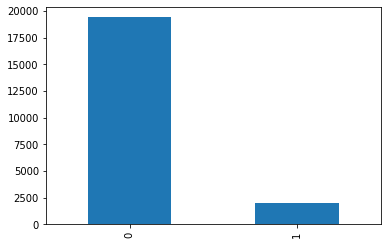

In [578]:
pd.value_counts(dummy_view_test["view_yes"]).sort_index().plot.bar() # take a look of the distribution

In [579]:
df["view_yes"] = dummy_view_test["view_yes"] # insert the summarized variable in the main dataframe

## renovated yes or no

In [580]:
# create a dummy-variable which shows whether the house was renovated or not
df["renoyes"] = (df["yr_renovated"] > 0) 
dummy_reno_yes = pd.get_dummies(df["renoyes"], prefix="reno_yes")
df["reno_yes"]=dummy_reno_yes["reno_yes_True"]
df.drop("renoyes", axis =1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale,price_log,view_yes,reno_yes
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,47.5112,-122.257,1340,5650,0,2014,10,12.309982,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,47.7210,-122.319,1690,7639,400,2014,12,13.195614,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,47.7379,-122.233,2720,8062,0,2015,2,12.100712,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,47.5208,-122.393,1360,5000,910,2014,12,13.311329,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,47.6168,-122.045,1800,7503,0,2015,2,13.142166,0,0


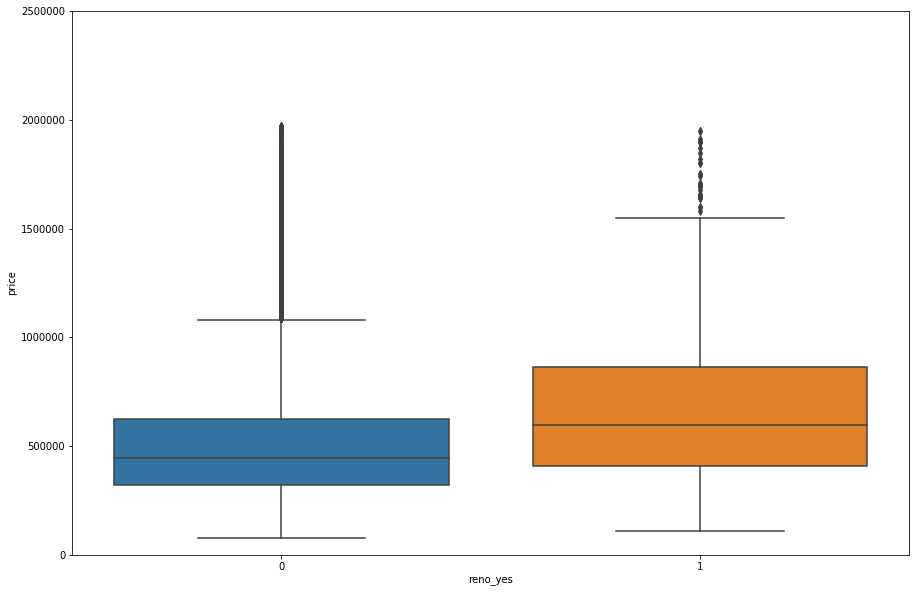

In [581]:
data_reno_yes = pd.concat([df["price"], df["reno_yes"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="reno_yes", y="price", data=data_reno_yes)
fig.axis(ymin=0, ymax=2500000);

## renovated in the last 10 years 

In [582]:
# create a dummy-variable which shows whether the house was renovated in the last 10 years or not
df["reno_last_10yrs"] = (df["yr_renovated"] >= 2005) 
dummy_reno = pd.get_dummies(df["reno_last_10yrs"], prefix="reno")
df["reno_last_10_yrs"]=dummy_reno["reno_True"]
df.drop("reno_last_10yrs", axis =1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,sqft_basement2,yr_sale,mth_sale,price_log,view_yes,reno_yes,reno_last_10_yrs
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,-122.257,1340,5650,0,2014,10,12.309982,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,400,2014,12,13.195614,0,1,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,0,2015,2,12.100712,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,910,2014,12,13.311329,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,0,2015,2,13.142166,0,0,0


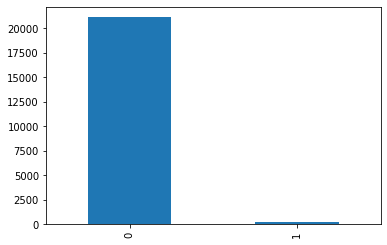

In [583]:
pd.value_counts(df["reno_last_10_yrs"]).plot.bar()

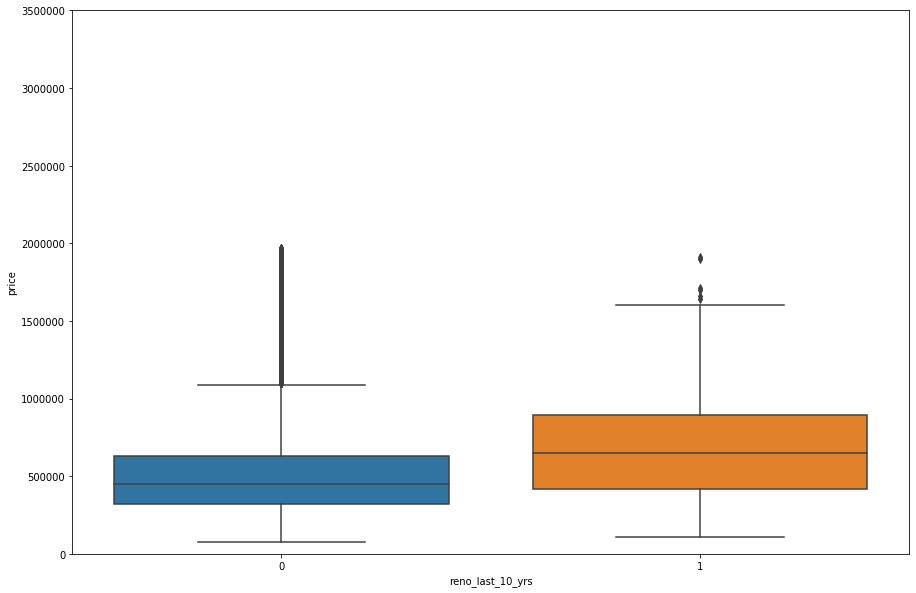

In [584]:
data_reno_last_10_yrs = pd.concat([df["price"], df["reno_last_10_yrs"]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x="reno_last_10_yrs", y="price", data=data_reno_last_10_yrs)
fig.axis(ymin=0, ymax=3500000);

# predictive modeling

In [585]:
# all the variables that i put in my regression
variable_set = ["grade", "sqft_basement2", "sqft_above", "floors", "sqft_living", "sqft_living15", "view_yes", "bathrooms", "bedrooms"]

In [586]:
# import missing libraries
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [587]:
# create a training-set and test-set for cross validation
X = df[variable_set]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

## multivariate linear regression

In [588]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.198e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:48:29   Log-Likelihood:                     -2.9071e+05
No. Observations:               21378   AIC:                                  5.814e+05
Df Residuals:                   21370   BIC:                                  5.815e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
grade           3.294e+04   1109.450     29.694      0.000    3.08e+04    3.51e+04
sqft_basement2    77.1853      2.522     30.605      0.000      72.242      82.129
sqft_above        48.6579      1.974     24.651      0.000      44.789      52.527
floors          4192.5765   3355.096      1.250      0.211   -2383.664    1.08e+04
sqft_living      125.8432      2.069     60.834      0.000     121.789     129.898
sqft_living15     36.4917      3.325     10.974      0.000      29.974      43.010
view_yes        1.507e+05   4888.919     30.835      0.000    1.41e+05     1.6e+05
bathrooms      -9841.6344   2982.931     -3.299      0.001   -1.57e+04   -3994.867
bedrooms       -4.907e+04   1719.279    -28.543      0.000   -5.24e+04   -4.57e+04
==============================================================================
Omnibus:                     5674.561   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20238.356
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                       6.982   Cond. No.                     2.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Root mean squared error (RMSE)

In [589]:
linereg =LinearRegression()
linereg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [590]:
print(linereg.coef_)
print(linereg.intercept_)
zip(variable_set, linereg.coef_)

[ 9.21295771e+04  7.27153171e+01  1.19760306e+01  2.46663593e+04
  8.46913477e+01  5.02100981e+01  1.32813411e+05 -2.43446374e+04
 -1.37386748e+04]
-448922.2504007091


In [591]:
y_pred = linereg.predict(X_test)
y_pred

array([610203.17362254, 512459.72345566, 576205.64884526, ...,
       349396.70624913, 460833.510794  , 349396.70624913])

In [592]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

190865.24353736747


## multicollinearity

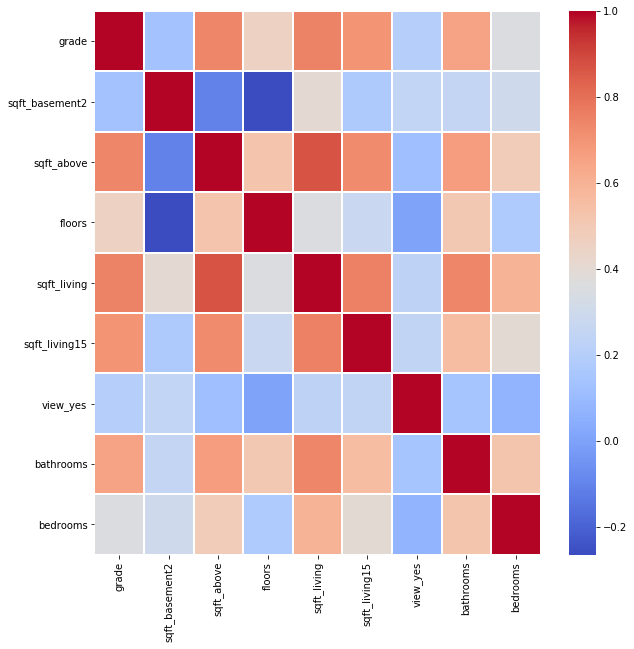

In [593]:
# look at the correlation between the set variables
plt.figure(figsize=(10,10))
sns.heatmap(df[variable_set].corr(),cmap='coolwarm', linewidths = 1)

# data visualization

In [594]:
import plotly.express as px
fig = px.scatter_mapbox(df[(df["price"] > df["price"].quantile(.90)) &  (df["waterfront"] == 1)], 
                        lat="lat",
                        lon="long", 
                        color="price",
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [595]:
fig = px.scatter_mapbox(df[(df["price"] < df["price"].median()) &  (df["waterfront"] == 1)], 
                        lat="lat",
                        lon="long", 
                        color="price",
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()